In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import h5py

In [2]:
matplotlib.rc('xtick', labelsize=28)
matplotlib.rc('ytick', labelsize=28)
matplotlib.rcParams['font.size']=28

In [3]:
fof1 = h5py.File('/home/ryan/Data/Data0/snaps/run_CDM_L3N256_DM_lower_softening/fof_subhalo_tab_007.hdf5', 'r')
fof2 = h5py.File('/home/ryan/Data/Data0/snaps/run_CDM_L3N256_lower_softening/fof_subhalo_tab_007.hdf5', 'r')

fof3 = h5py.File('/home/ryan/Data/Data0/snaps/run_2cDM_L3N256_DM_power00_sigma1/fof_subhalo_tab_007.hdf5', 'r')
fof4 = h5py.File('/home/ryan/Data/Data0/snaps/run_2cDM_L3N256_lower_softening/fof_subhalo_tab_007.hdf5', 'r')


In [4]:
def get_info(fof):
    Redshift="{:.2e}".format(fof['Header'].attrs['Redshift'])
    Boxsize=int((fof['Header'].attrs['BoxSize']))
    
    Subhalo=fof.get('Subhalo')

    Subhalo_CM=np.array(Subhalo['SubhaloCM'])
    Subhalo_Radius=np.array(Subhalo['SubhaloHalfmassRad'])
    
    return Redshift, Boxsize, Subhalo_CM, Subhalo_Radius

In [5]:
redshift1, boxsize1, subhalo_cm1, subhalo_radius1 = get_info(fof1)

redshift2, boxsize2, subhalo_cm2, subhalo_radius2 = get_info(fof2)

redshift3, boxsize3, subhalo_cm3, subhalo_radius3 = get_info(fof3)

redshift4, boxsize4, subhalo_cm4, subhalo_radius4 = get_info(fof4)

In [6]:
len(subhalo_cm2)

8585

In [7]:
def get_pos_vel(snap):
    
    with h5py.File(snap) as s:
        
        DM = s.get('PartType1')
        
        DMpos=np.array(DM['Coordinates'])
        DMvel=np.array(DM['Velocities'])
    
        return DMpos, DMvel

In [8]:
snap1 = '/home/ryan/Data/Data0/snaps/run_CDM_L3N256_DM_lower_softening/snap_007.hdf5'
snap2 = '/home/ryan/Data/Data0/snaps/run_CDM_L3N256_lower_softening/snap_007.hdf5'
snap3 = '/home/ryan/Data/Data0/snaps/run_2cDM_L3N256_DM_power00_sigma1/snap_007.hdf5'
snap4 = '/home/ryan/Data/Data0/snaps/run_2cDM_L3N256_lower_softening/snap_007.hdf5'

pos1, vel1 = get_pos_vel(snap1)
pos2, vel2 = get_pos_vel(snap2)
pos3, vel3 = get_pos_vel(snap3)
pos4, vel4 = get_pos_vel(snap4)

/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
def get_COM(Subhalo_CM, halo_size):
    x, y, z = Subhalo_CM[halo_size]
    return x, y, z

def get_particle_distribution(DMpos, DMvel, Subhalo_CM, Subhalo_Radius, halo_size):
    
    vx = DMvel[:,0]
    vy = DMvel[:,1]
    vz = DMvel[:,2]

    x = DMpos[:,0]
    y = DMpos[:,1]
    z = DMpos[:,2]

    Radius=Subhalo_Radius[halo_size]
    
    COM_x, COM_y, COM_z = get_COM(Subhalo_CM, halo_size)
    
    Radius=Subhalo_Radius[halo_size]


    distance = np.sqrt((COM_x - x)**2 + (COM_y - y)**2 + (COM_z - z)**2)

    vx_in = vx[ distance < Radius ]
    vy_in = vy[ distance < Radius ]
    vz_in = vz[ distance < Radius ]

    Velocity = np.sqrt(vx_in**2 + vy_in**2 + vz_in**2)


    numberofparticles=len(Velocity)


    #make a bin for the velocity
    v_min=0.5*min(Velocity)
    v_max=max(Velocity)
    Bin1=[]
    v=0
    i=0
    while v<v_max:
        v=np.power(1.08,i)*v_min
        i=i+1
        #print(v)
        Bin1.append(v)


    #print('Bin',Bin1)



    #############Here we calculate the velocity distribution


    Vdistribution1=[]        #This the the thing that we shall plot along the bin
    for i in range(len(Bin1)):
        try:
            nin = np.sum( (Velocity > Bin1[i]) & (Velocity < Bin1[i+1]) )
        # lazily handling the end of the array :/
        except:
            nin = 0
        Vdistribution1.append(nin)
        
    return Bin1, Vdistribution1, Radius, numberofparticles

Particle_distribution_inside_halo_L3000#1055842gevolution_GR.png
Particle_distribution_inside_halo_L3000#7535gevolution_GR.png
Particle_distribution_inside_halo_L3000#3801gevolution_GR.png
Particle_distribution_inside_halo_L3000#3583gevolution_GR.png
Particle_distribution_inside_halo_L3000#2356gevolution_GR.png
Particle_distribution_inside_halo_L3000#1448gevolution_GR.png
Particle_distribution_inside_halo_L3000#1098gevolution_GR.png
Particle_distribution_inside_halo_L3000#943gevolution_GR.png


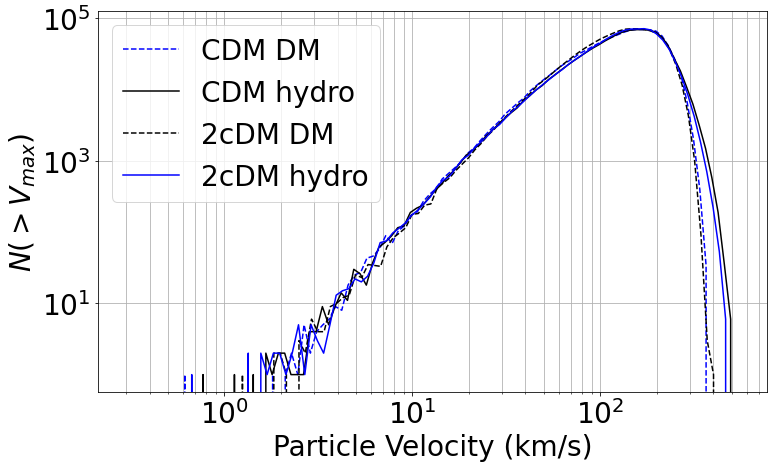

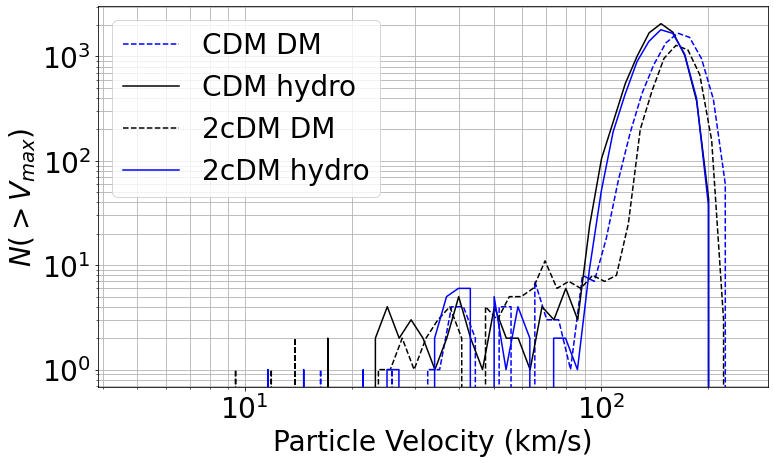

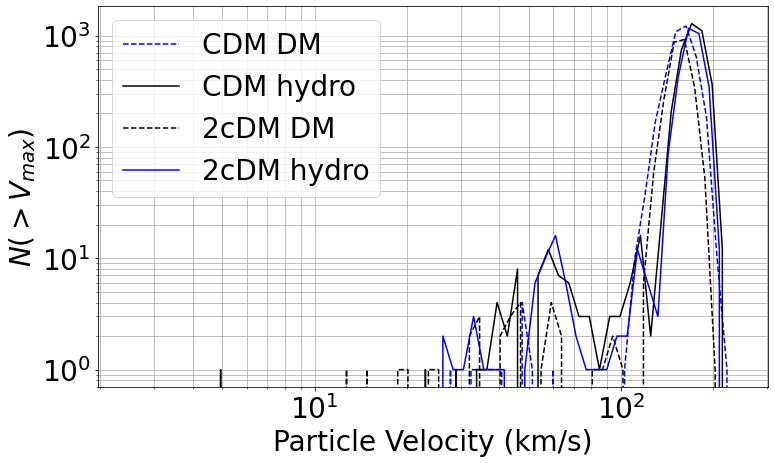

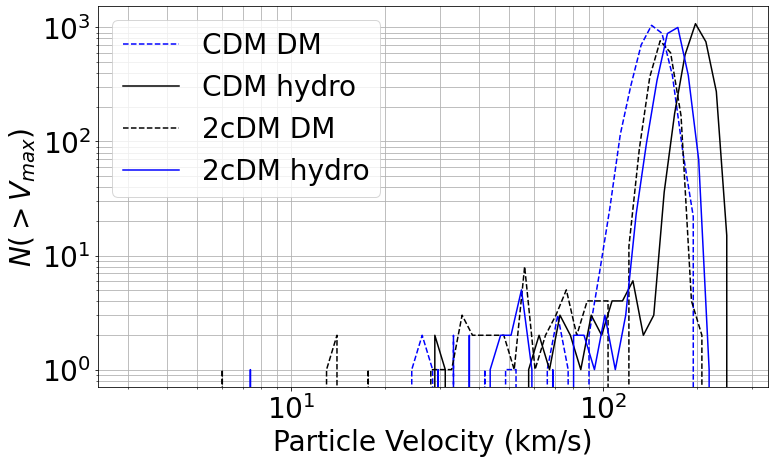

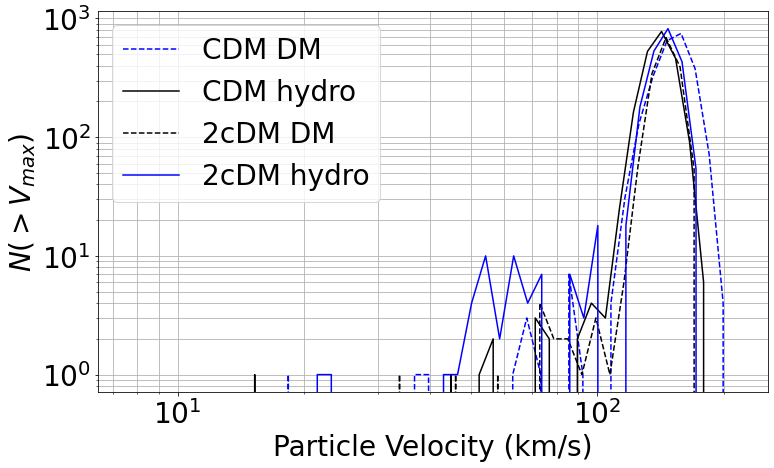

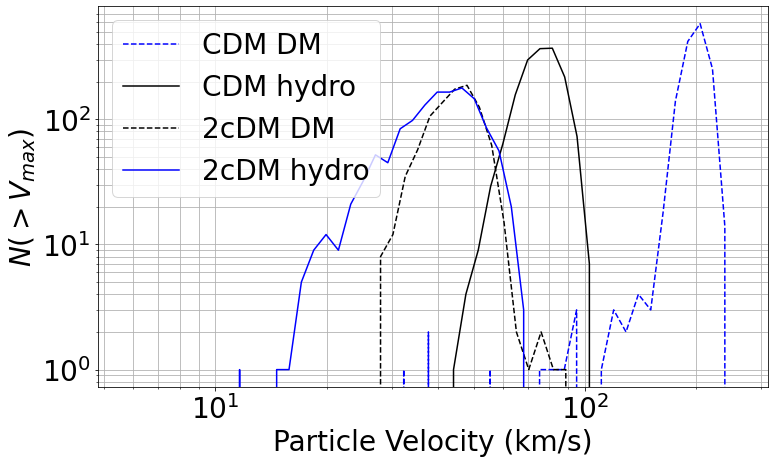

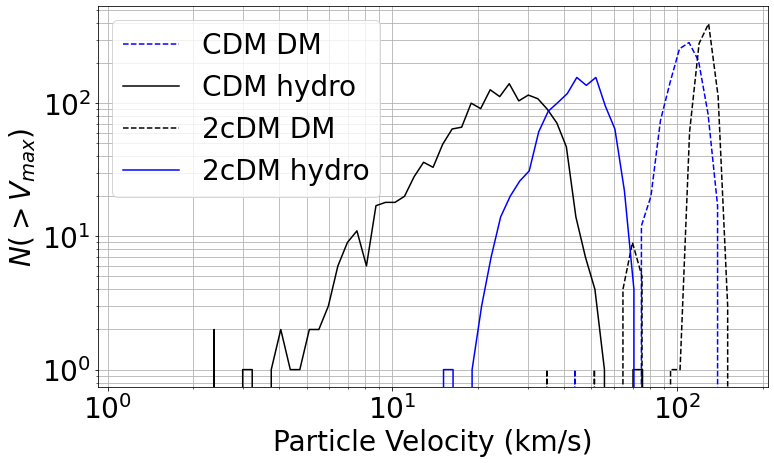

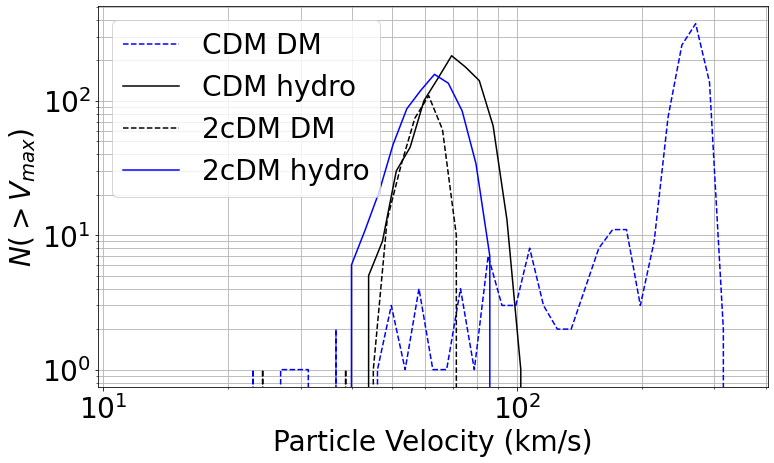

In [10]:
halos=[0,1,2,3,5,8,9,15]

for halo_size in halos:
    
    bin1, v1, r1, n1 = get_particle_distribution(pos1, vel1, subhalo_cm1, subhalo_radius1, halo_size)
    bin2, v2, r2, n2 = get_particle_distribution(pos2, vel2, subhalo_cm2, subhalo_radius2, halo_size)
    
    bin3, v3, r3, n3 = get_particle_distribution(pos3, vel3, subhalo_cm3, subhalo_radius3, halo_size)
    bin4, v4, r4, n4 = get_particle_distribution(pos4, vel4, subhalo_cm4, subhalo_radius4, halo_size)
    
    fig,ax=plt.subplots(figsize=[12,7])
    ax.plot(bin1, v1, '--', label=f'CDM DM', color='b')
    ax.plot(bin2, v2, label=f'CDM hydro', color='k')
    
    ax.plot(bin3, v3, '--', label=f'2cDM DM', color='k')
    ax.plot(bin4, v4, label=f'2cDM hydro', color='b')
    
    #fig.suptitle('Distribution inside Halo CDM L'+str(boxsize1)+' z='+str(redshift1) , fontsize=14, fontweight='bold')

    plt.yscale("log")
    plt.xscale("log")

    plt.grid(True, which="both", ls="-")

    #cmx1, cmy1, cmz1 = get_COM(subhalo_cm1, halo_size)
    #cmx2, cmy2, cmz2 = get_COM(subhalo_cm2, halo_size)
    
    #plt.title(f'GR Position: ({cmx1:.2f}, {cmy1:.2f} ,{cmz1:.2f}); Newton Position: ({cmx2:.2f}, {cmy2:.2f}, {cmz2:.2f})',fontsize=8)
    plt.xlabel("Particle Velocity [km s$^{-1}$]")
    plt.ylabel("$N\\left(>V_{max}\\right)$")
    plt.legend()
    #plt.show()
    output_filename = 'Particle_distribution_inside_halo_L'+str(boxsize1)+'#'+str(n1) + 'gevolution_GR' + '.png'

    print(output_filename)
    plt.savefig(output_filename)
    #plt.show()